In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv('./data/train.csv')
df.ix[:5, :10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub


In [3]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [4]:
cols = list(df.columns)
cols[1:11]

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig']

### Encoding values

1.MSZoning : one-hot-encoding

In [33]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

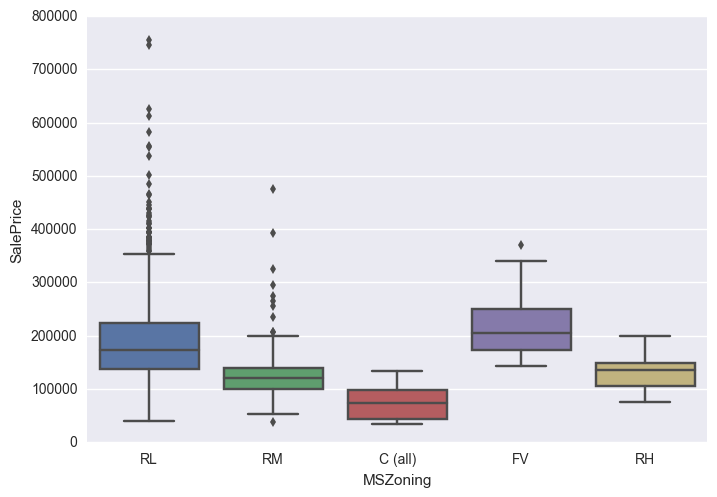

In [32]:
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.show()

In [5]:
ohe = OneHotEncoder()
lbe = LabelEncoder()
temp = lbe.fit_transform(df['MSZoning'])
temp2 = temp.reshape(-1,1)
result = ohe.fit_transform(temp2)

In [6]:
lbe.classes_

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

In [16]:
df_MSZoning = pd.DataFrame(result.toarray(), columns=['C','FV','RH','RL','RM'])

2.Street : 카테고리간 편차가 극심해서 삭제

In [23]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

3.Alley : 1400/1500 데이터가 빈값이어서 삭제

In [24]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

4.LotShape : 카테고리간 차이가 유의미하지 않아서 삭제

In [26]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

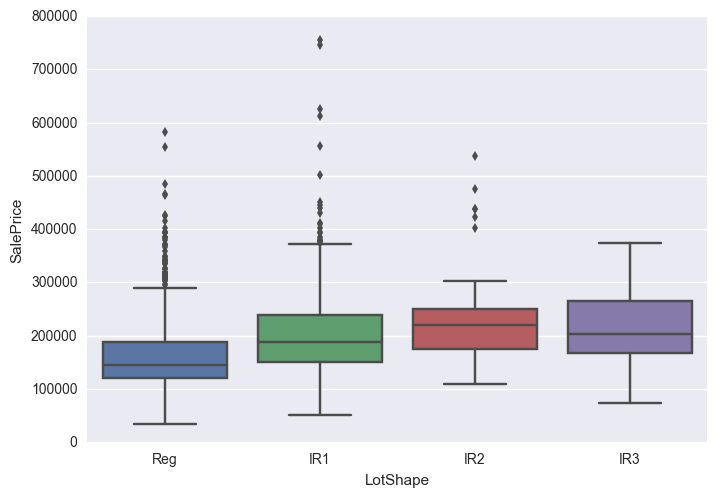

In [31]:
sns.boxplot(x='LotShape',y='SalePrice', data=df)
plt.show()

5.LandContour : 차이가 유의미하지 않아서 삭제

In [34]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

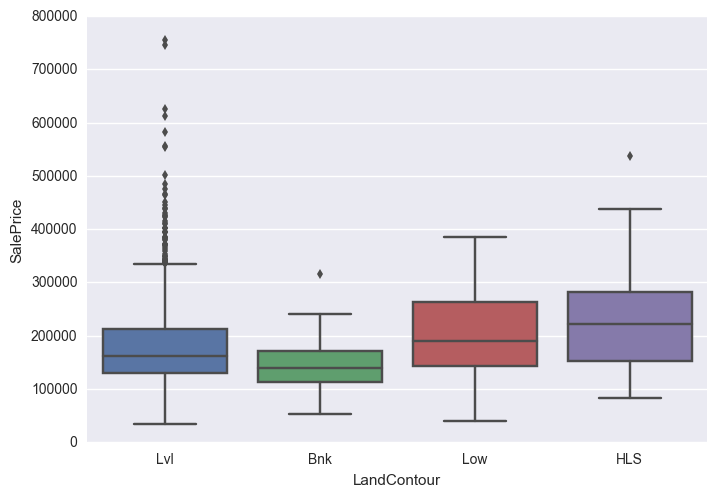

In [35]:
sns.boxplot('LandContour', 'SalePrice', data=df)
plt.show()

### Boxplot of category datas
- idx = [9,10,11,12,13,14,15,16,17,18,21,22,23,24,25,27,28,29,30,31,32,33,35,39,40,41,42,53,55,57,58,60,63,64,65,72,73,74,78,79]
- 카테고리별 차이가 있어보임
 + Neighborhood(12), OverallQual(17), (MasVnrType(25)), ExterQual(27), BsmtQual(30), (BsmtExposure(32)), KitchenQual,  Garage Type, GarageFinish
- 카테고리를 통합하면 결과가 향상될것 같다
 + Exterior1st, Exterior2nd, BsmtFinType1, (PavedDrive), SaleType, SaleCondition, HeatingQC(40)
- 카테고리별 차이가 없다
 + Utilities, LotConfig, LandSlope, Condition1, Condition2, OverallCond, RoofStyle,  BsmtCond, CentralAir, Electrical, BldgType, HouseStyle, RoofMatl, ExterCond, BsmtType2, Heating, Functional, FireplaceQu, GarageQual, GarageCond, PoolQC, Fence, (Foundation)

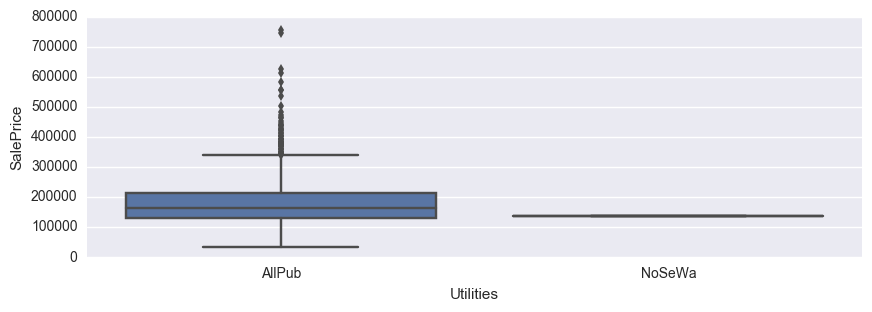

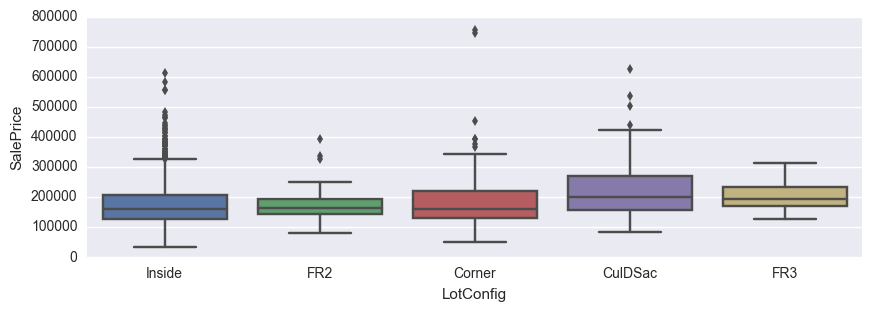

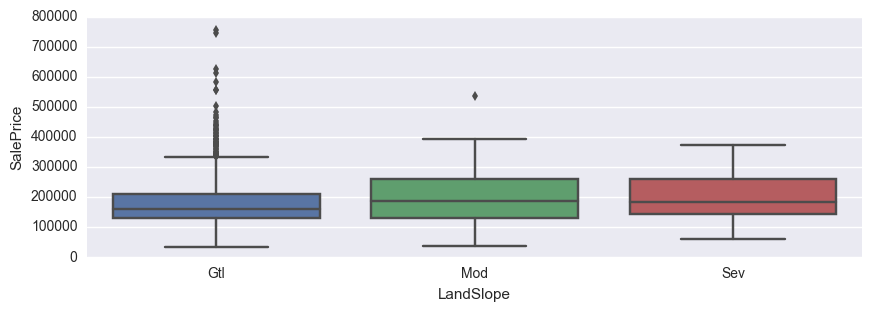

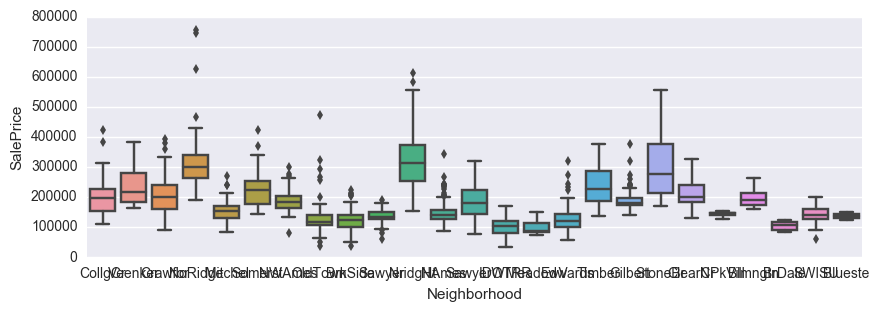

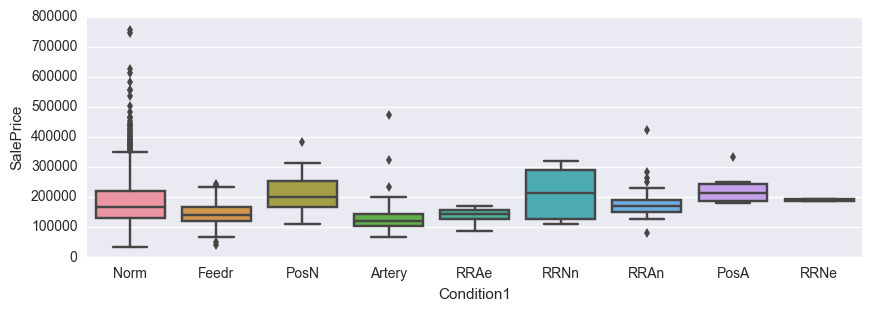

In [43]:
lst = list(df.columns)
for i in range(5):
    idx = [9,10,11,12,13]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(5,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

In [111]:
df.columns[40]

'HeatingQC'

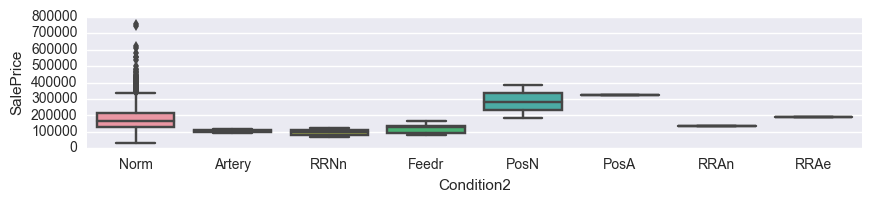

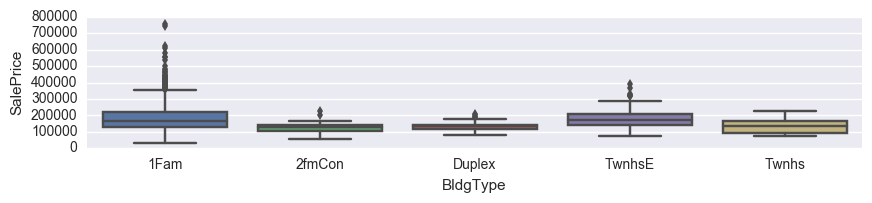

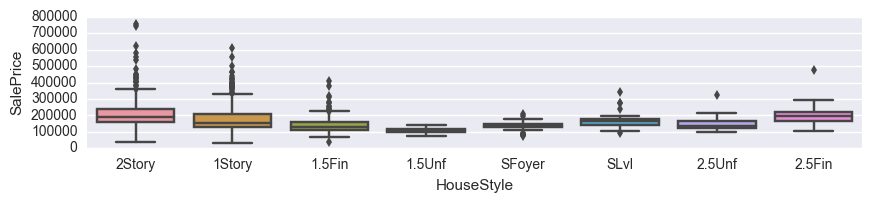

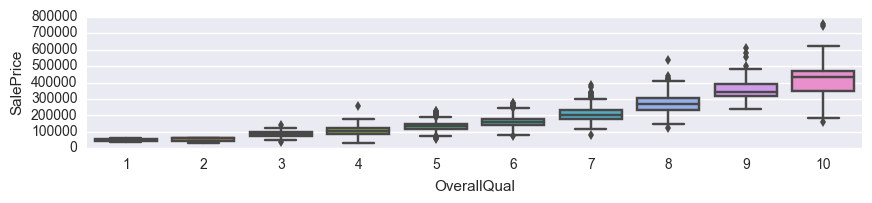

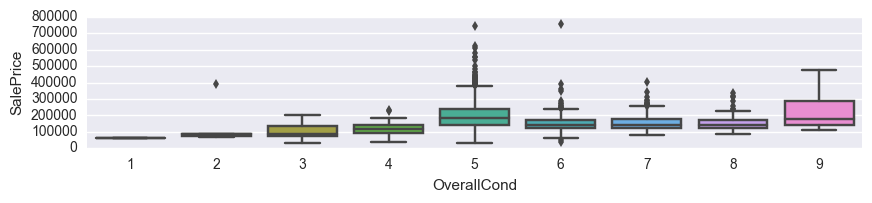

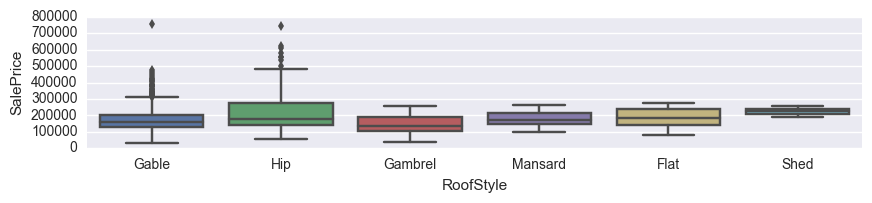

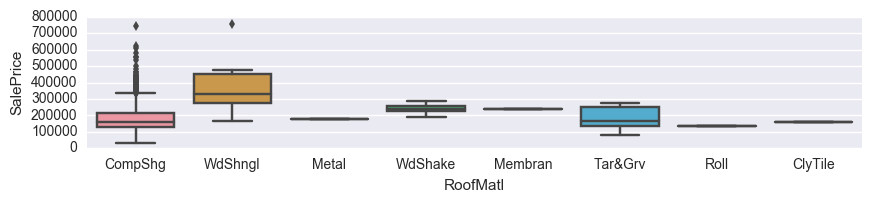

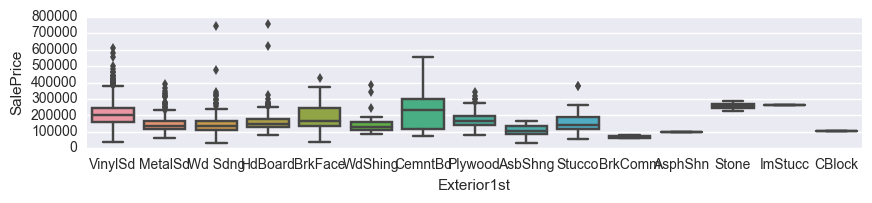

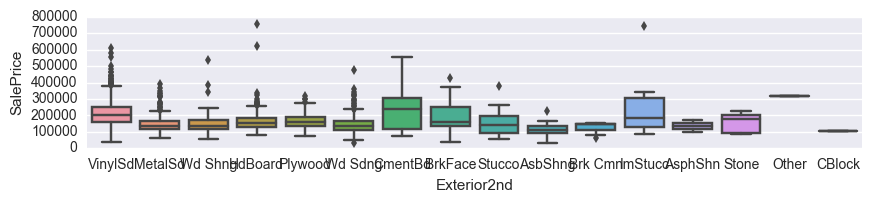

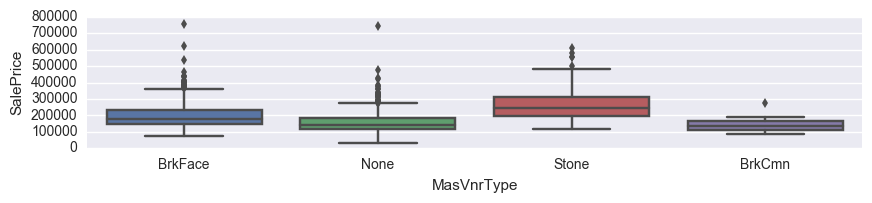

In [58]:
lst = list(df.columns)
for i in range(10):
    idx = [14,15,16,17,18,21,22,23,24,25]
    x = idx[i]
    plt.figure(figsize=(10,20))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

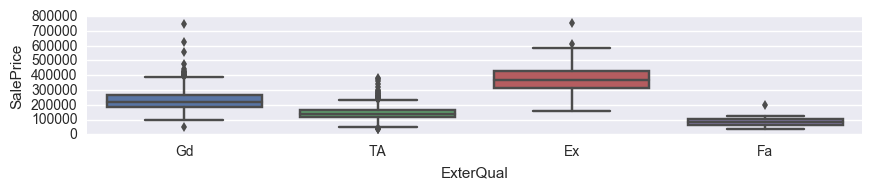

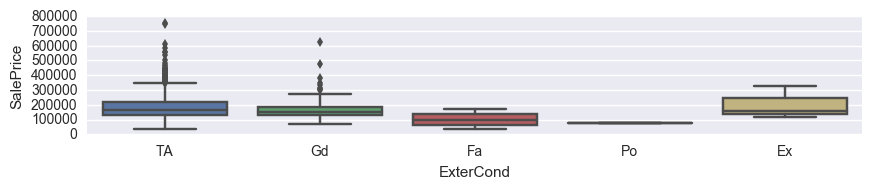

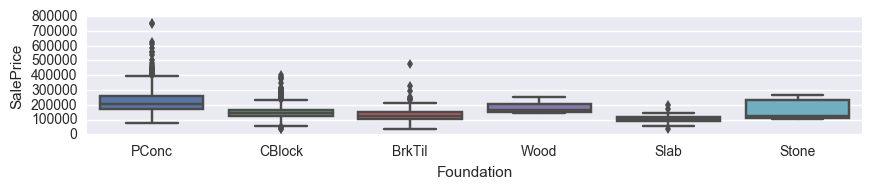

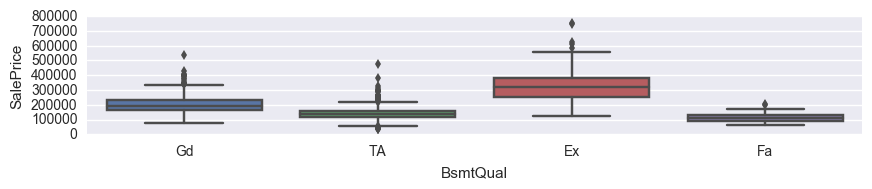

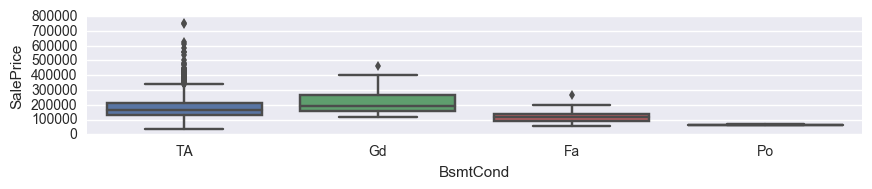

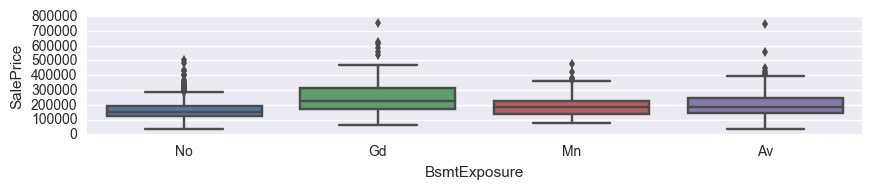

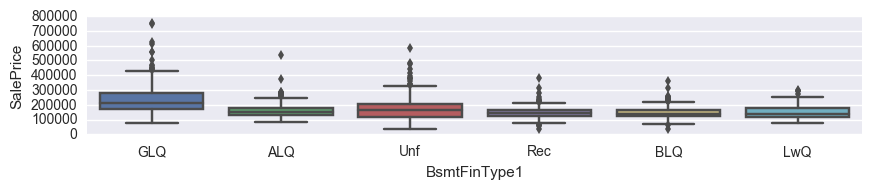

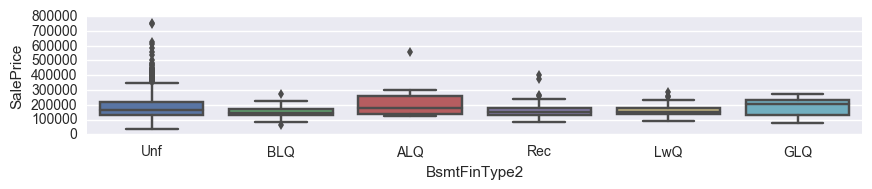

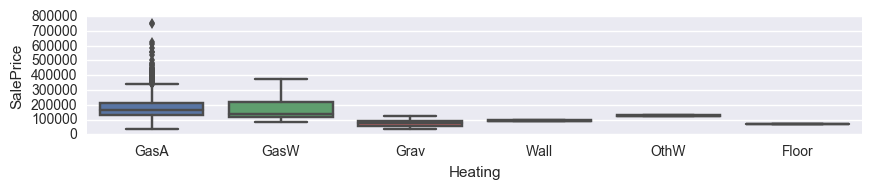

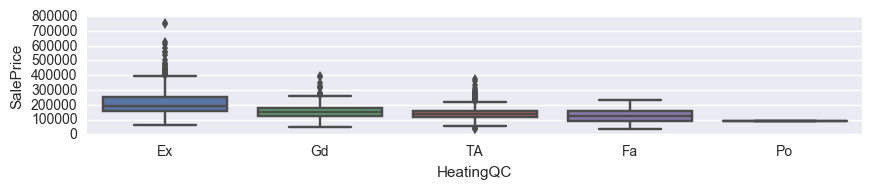

In [69]:
lst = list(df.columns)
for i in range(10):
    idx = [27,28,29,30,31,32,33,35,39,40]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

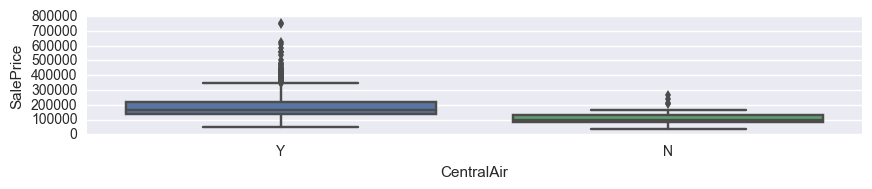

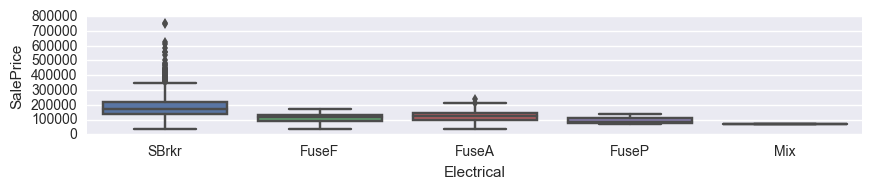

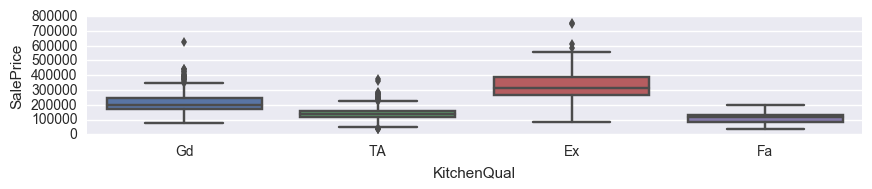

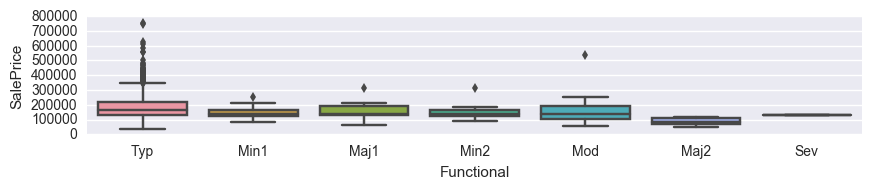

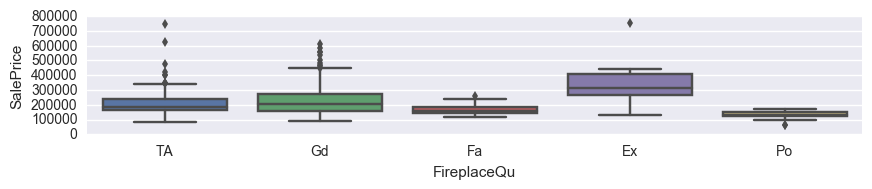

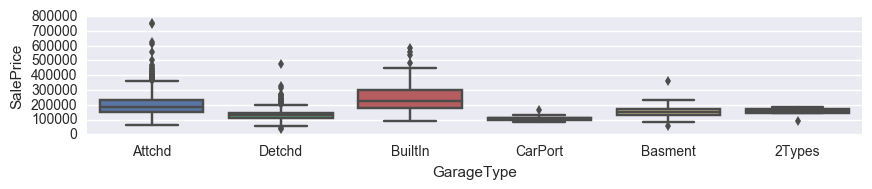

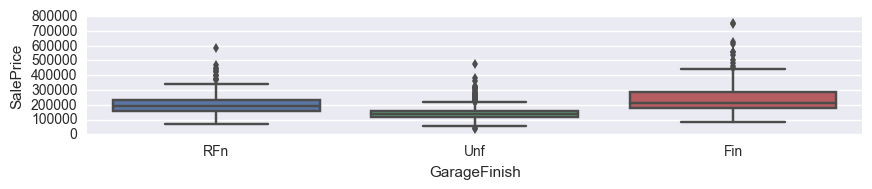

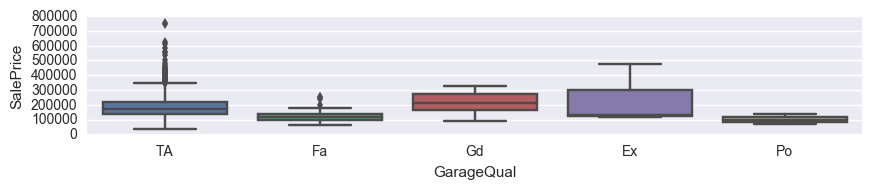

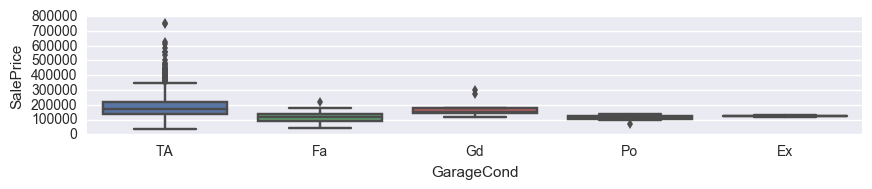

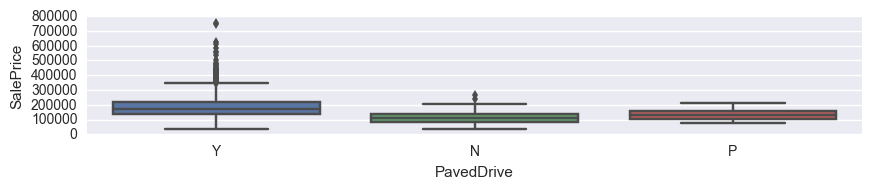

In [82]:
lst = list(df.columns)
for i in range(10):
    idx = [41,42,53,55,57,58,60,63,64,65]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

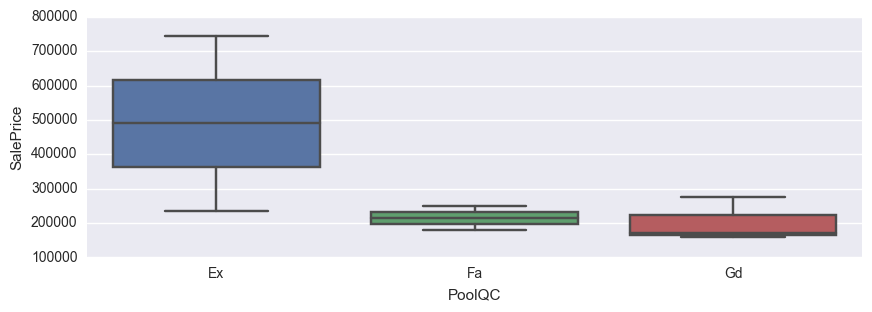

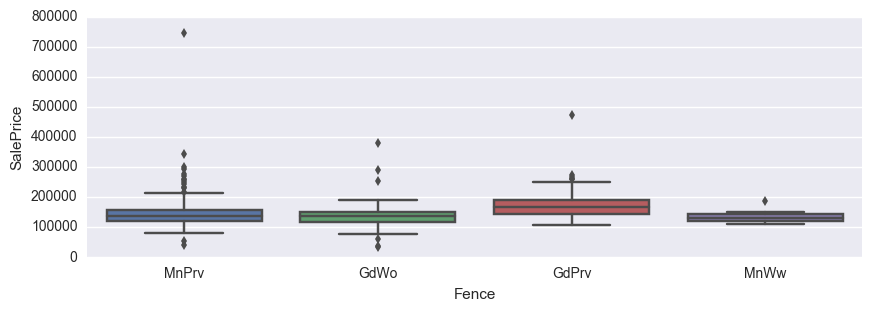

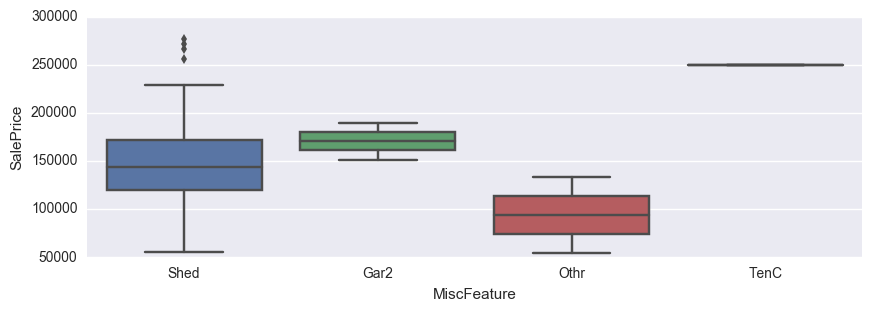

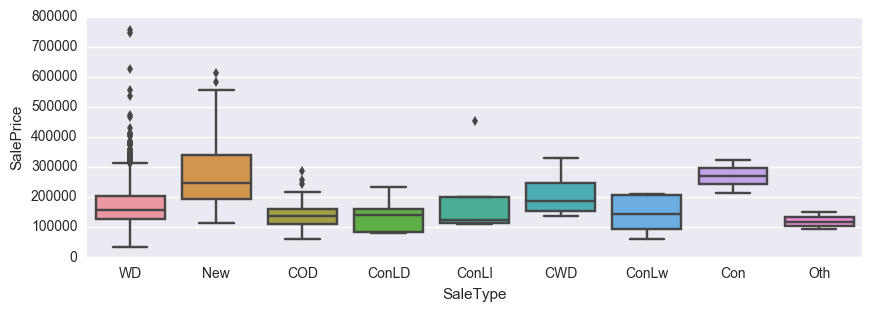

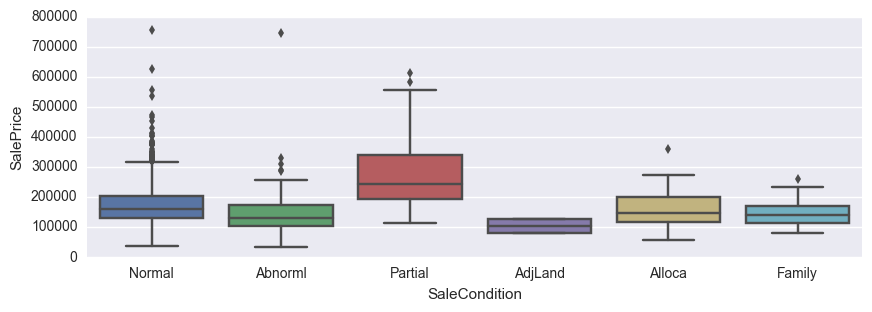

In [94]:
lst = list(df.columns)
for i in range(5):
    idx = [72,73,74,78,79]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(5,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()